# Import

In [1]:
# Work with paths
import sys
sys.path.append('..')

# import implemented modules
import src.config as cfg
from src.data import make_dataset
import src.utils as utils

# import other modules
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import sklearn


# Generate Dataset

In [3]:
! python3 ../src/data/make_dataset.py                           \
    --input_filepath=../data/raw/train.csv                      \
    --output_data_filepath=../data/processed/train_data.pkl     \
    --output_target_filepath=../data/processed/target_data.pkl

2022-10-15 21:32:47,855 - __main__ - INFO - making final data set from raw data
2022-10-15 21:32:47,887 - __main__ - INFO - Target saved to ../data/processed/target_data.pkl
2022-10-15 21:32:47,887 - __main__ - INFO - Dataset saved to ../data/processed/train_data.pkl


In [4]:
! python3 ../src/data/make_dataset.py                           \
    --input_filepath=../data/raw/test.csv                       \
    --input_target_filepath=../data/raw/sample_solution.csv     \
    --output_data_filepath=../data/processed/val_data.pkl       \
    --output_target_filepath=../data/processed/val_target.pkl

2022-10-15 21:32:49,006 - __main__ - INFO - making final data set from raw data
2022-10-15 21:32:49,030 - __main__ - INFO - Target saved to ../data/processed/val_target.pkl
2022-10-15 21:32:49,030 - __main__ - INFO - Dataset saved to ../data/processed/val_data.pkl


Load dataset

In [5]:
train  = pd.read_pickle(str(os.getcwd() + "/../data/processed/train_data.pkl"))
target = pd.read_pickle(str(os.getcwd() + "/../data/processed/target_data.pkl"))

val_data   = pd.read_pickle(str(os.getcwd() + "/../data/processed/val_data.pkl"))
val_target = pd.read_pickle(str(os.getcwd() + "/../data/processed/val_data.pkl"))

Generate tran and test selections

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    utils.preprocess_pipe.fit_transform(train), 
                                                    target, 
                                                    train_size=0.8, 
                                                    random_state=cfg.RANDOM_STATE, 
                                                    stratify=target.iloc[:,[1, 2, 3, 4]].sum(axis=1)
                                                    )

Visualize data

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=cfg.RANDOM_STATE, perplexity=15, n_iter=1000, verbose=0)
train_copy = train.copy()
train_copy = np.array(utils.preprocess_pipe.fit_transform(train_copy))
tsne_representation = tsne.fit_transform(train_copy)

plt.figure(figsize=(10,8))
sns.scatterplot(data=pd.DataFrame(tsne_representation))

/Users/alexgiving/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/alexgiving/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(955, 136)


/Users/alexgiving/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/alexgiving/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(955, 3)


/var/folders/87/3cnclgy53jd11fkzc4qp7mlc0000gn/T/ipykernel_79550/3062988363.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'Z Label')

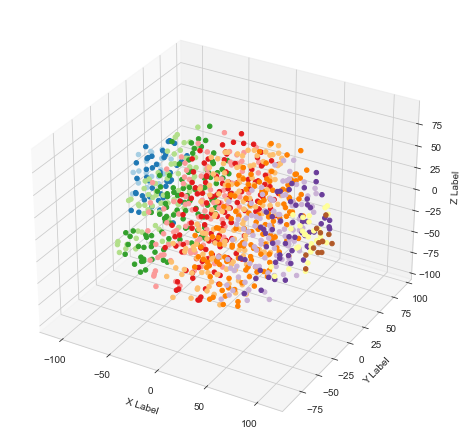

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=cfg.RANDOM_STATE, perplexity=30, n_iter=1000)
train_copy = train.copy()
train_copy = np.array(utils.preprocess_pipe.fit_transform(train_copy))
print(train_copy.shape)
tsne_representation = tsne.fit_transform(train_copy)
print(tsne_representation.shape)



import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)
x = tsne_representation[:, 0]
y = tsne_representation[:, 1]
z = tsne_representation[:, 2]

g = ax.scatter(x, y, z, c=x, marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

If we want to predict illness, we are interested in not getting FalseNegative 

Generate features

In [11]:
None

Catboost

In [14]:
from catboost import CatBoostClassifier, metrics, Pool
train_pool = Pool(X_train, Y_train)
test_pool = Pool(X_test, Y_test)


model = CatBoostClassifier(
    loss_function='MultiLogloss',
    eval_metric='HammingLoss',
    iterations=500,
)

model.fit(train_pool, 
        eval_set=test_pool, 
        metric_period=10, 
        plot=True, 
        verbose=50,
        
        )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.040085
0:	learn: 0.1277487	test: 0.1308901	best: 0.1308901 (0)	total: 5.87ms	remaining: 2.93s
50:	learn: 0.1175393	test: 0.1277487	best: 0.1267016 (20)	total: 221ms	remaining: 1.95s
100:	learn: 0.1089005	test: 0.1256545	best: 0.1246073 (80)	total: 444ms	remaining: 1.75s
150:	learn: 0.1002618	test: 0.1256545	best: 0.1246073 (80)	total: 659ms	remaining: 1.52s
200:	learn: 0.0934555	test: 0.1246073	best: 0.1246073 (80)	total: 875ms	remaining: 1.3s
250:	learn: 0.0790576	test: 0.1277487	best: 0.1246073 (80)	total: 1.09s	remaining: 1.08s
300:	learn: 0.0628272	test: 0.1308901	best: 0.1246073 (80)	total: 1.31s	remaining: 867ms
350:	learn: 0.0510471	test: 0.1350785	best: 0.1246073 (80)	total: 1.53s	remaining: 650ms
400:	learn: 0.0395288	test: 0.1350785	best: 0.1246073 (80)	total: 1.75s	remaining: 431ms
450:	learn: 0.0293194	test: 0.1340314	best: 0.1246073 (80)	total: 1.97s	remaining: 214ms
499:	learn: 0.0209424	test: 0.1340314	best: 0.1246073 (80)	total: 2.18s	remaining: 0